In [1]:
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from sklearn import preprocessing
from sklearn.metrics import make_scorer


### **Variance Model**

In [25]:
data = np.loadtxt('/content/vardQ_.6f.csv',delimiter=',',skiprows=1) # skip row for column names

In [28]:
test_ind = np.array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 83])

train_ind = np.array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81])

secondary_ind = np.array([ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122])

In [31]:
x_train = data[:, 0][train_ind]
y_train = data[:, 1][train_ind]

x_test = data[:, 0][test_ind]
y_test = data[:, 1][test_ind]

x_stest = data[:, 0][secondary_ind]
y_stest = data[:, 1][secondary_ind]

regressor = SVR()

In [57]:
# Create the random grid
# Create the random grid
def loss(ground_truth, predictions):
    diff = np.sqrt(np.mean((10**ground_truth - 10**predictions)**2))
    return diff

my_scorer = make_scorer(loss, greater_is_better=False)

param_grid = {'C': np.logspace(-5, 1, base=10, num=1000),
              'kernel': ['rbf', 'sigmoid'],
              'gamma': np.logspace(-5, 0, base=10, num=50),  #changed from -5,1
              'epsilon': np.logspace(-5, 1, base=10, num=50)} #changed from #-5,1
print(y_train)
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)
model= RandomizedSearchCV(estimator= regressor, n_iter = 10000, cv=folds, param_distributions = param_grid ,scoring=my_scorer, random_state=42,verbose=2, return_train_score=True, n_jobs = -1)
print(model)
model.fit(x_train.reshape(-1, 1),y_train)

[3.349666 3.232742 2.803457 3.022841 2.944483 2.935507 2.839478 2.727541
 3.006038 2.931458 2.925312 2.962369 2.942504 2.879096 2.846955 2.811575
 2.79588  3.021603 2.813581 2.777427 2.170262 2.525045 2.681241 2.748963
 2.660865 2.685742 2.687529 2.700704 2.710117 2.694605 2.673021 2.706718
 2.682145 2.715167 2.698101 2.728354 2.667453 2.698101 2.668386 2.659916
 2.632457]
RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=SVR(C=1.9023011886689458,
                                 epsilon=4.094915062380427e-05,
                                 gamma=0.3727593720314938),
                   n_iter=10000, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-05, 1.01392541e-05, 1.02804473e-05, 1.04236067e-05,
       1.05687597e-05, 1.07159340e-05, 1.08651577e-05, 1.10164595e-05,
       1.11698682e-05,...
       1.84206997e-02, 2.32995181e-02, 2.94705170e-02, 3.72759372e-02,
       4.71486636e-02, 5.96362332e-02, 7.5431

RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=SVR(C=1.9023011886689458,
                                 epsilon=4.094915062380427e-05,
                                 gamma=0.3727593720314938),
                   n_iter=10000, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-05, 1.01392541e-05, 1.02804473e-05, 1.04236067e-05,
       1.05687597e-05, 1.07159340e-05, 1.08651577e-05, 1.10164595e-05,
       1.11698682e-05,...
       1.84206997e-02, 2.32995181e-02, 2.94705170e-02, 3.72759372e-02,
       4.71486636e-02, 5.96362332e-02, 7.54312006e-02, 9.54095476e-02,
       1.20679264e-01, 1.52641797e-01, 1.93069773e-01, 2.44205309e-01,
       3.08884360e-01, 3.90693994e-01, 4.94171336e-01, 6.25055193e-01,
       7.90604321e-01, 1.00000000e+00]),
                                        'kernel': ['rbf', 'sigmoid']},
                   random_state=42, return_train_score=True,
                   scoring=make_scorer(loss, greater_is_better=False),
                   verbose=2)

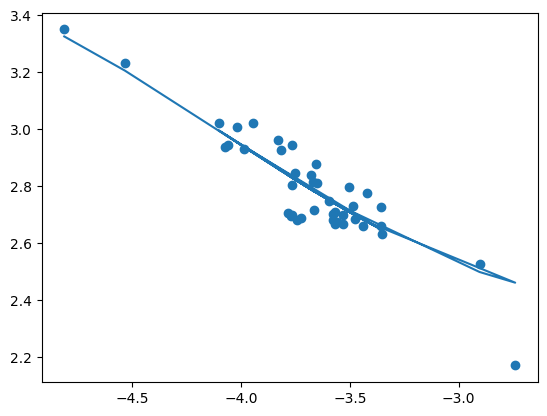

In [42]:
plt.scatter(x_train,y_train)
plt.plot(x_train, model.predict(x_train.reshape(-1,1)))

In [58]:
print("Best RMS score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best RMS score:  -107.44589284946795
Best hyperparameters:  {'kernel': 'rbf', 'gamma': 0.09540954763499944, 'epsilon': 0.020235896477251575, 'C': 6.162966255132942}


In [59]:
regressor = SVR(kernel=model.best_params_['kernel'],epsilon=model.best_params_['epsilon'], gamma = model.best_params_['gamma'], C=model.best_params_['C'])
regressor.fit(x_train.reshape(-1,1),y_train)

SVR(C=6.162966255132942, epsilon=0.020235896477251575,
    gamma=0.09540954763499944)

In [60]:
print("RMSE on Train Data: ", np.sqrt(np.mean((np.power(10,regressor.predict(x_train.reshape(-1,1)))-
                                               np.power(10,y_train))**2) ))

RMSE on Train Data:  106.14744085834597


In [61]:
print("RMSE on Primary Test: ", np.sqrt(np.mean((np.power(10,regressor.predict(x_test.reshape(-1,1)))-np.power(10,y_test))**2) ))

RMSE on Primary Test:  135.80478350682196


In [62]:
print("RMSE on Secondary Test: ", np.sqrt(np.mean((np.power(10,regressor.predict(x_stest.reshape(-1,1)))-np.power(10,y_stest))**2)))

RMSE on Secondary Test:  205.80560239723107


In [56]:
print("MPE on Train Data: ",np.average(np.abs((10**regressor.predict(x_train.reshape(-1,1))-10**y_train)/10**y_train)))
print("MPE on Primary Test: ",np.average(np.abs((10**regressor.predict(x_test.reshape(-1,1))-10**y_test)/10**y_test)))
print("MPE on Secondary Test: ",np.average(np.abs((10**regressor.predict(x_stest.reshape(-1,1))-10**y_stest)/10**y_stest)))

MPE on Train Data:  0.150218315028155
MPE on Primary Test:  0.15565932897956947
MPE on Secondary Test:  0.15841675294323923


### **Full Model**

In [5]:
data = np.loadtxt('/content/features.csv',delimiter=',',skiprows=1)

In [7]:
test_ind = np.array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 83])

train_ind = np.array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81])

secondary_ind = np.array([ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123])

In [ ]:
x_train = data[train_ind,1:]
y_train = data[train_ind,0]
y_train = np.log10(y_train) #tried with np.log10 as well

x_test = data[test_ind,1:]
y_test = data[test_ind,0]
y_test = np.log10(y_test)

x_stest = data[secondary_ind,1:]
y_stest = data[secondary_ind,0]
y_stest = np.log10(y_stest)
print(y_train)

regressor = SVR()
# regressor.fit(x_train.reshape(-1, 1),y_train)

[3.33445375 3.15654915 3.03100428 2.93951925 2.89652622 2.85672889
 2.93298082 2.89652622 2.74741181 3.00732095 2.93951925 2.93449845
 2.85064624 2.86391738 2.87040391 2.84757266 2.79028516 2.98497713
 2.84633711 2.78958071 2.47712125 2.64147411 2.64738297 2.7084209
 2.67851838 2.68394713 2.69372695 2.66370093 2.68930886 2.72181062
 2.66370093 2.67024585 2.69722934 2.6919651  2.71600334 2.66558099
 2.6794279  2.66181269 2.63245729 2.66464198 2.68752896]


In [ ]:
# Create the random grid
# Create the random grid
def loss(ground_truth, predictions):
    diff = np.sqrt(np.mean((10**ground_truth - 10**predictions)**2))
    return diff

my_scorer = make_scorer(loss, greater_is_better=False)

param_grid = {'C': np.logspace(-5, 1, base=10, num=1000),
              'kernel': ['linear','rbf', 'sigmoid'],
              'gamma': np.logspace(-5, 1, base=10, num=50),  #changed from -5,1
              'epsilon': np.logspace(-5, 1, base=10, num=50)} #changed from #-5,1
print(y_train)
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)
model= RandomizedSearchCV(estimator= regressor, n_iter = 10000, cv=folds, param_distributions = param_grid ,scoring=my_scorer, random_state=42,verbose=2, return_train_score=True, n_jobs = -1)
print(model)
model.fit(x_train,y_train)

[3.33445375 3.15654915 3.03100428 2.93951925 2.89652622 2.85672889
 2.93298082 2.89652622 2.74741181 3.00732095 2.93951925 2.93449845
 2.85064624 2.86391738 2.87040391 2.84757266 2.79028516 2.98497713
 2.84633711 2.78958071 2.47712125 2.64147411 2.64738297 2.7084209
 2.67851838 2.68394713 2.69372695 2.66370093 2.68930886 2.72181062
 2.66370093 2.67024585 2.69722934 2.6919651  2.71600334 2.66558099
 2.6794279  2.66181269 2.63245729 2.66464198 2.68752896]
RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=SVR(), n_iter=10000, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-05, 1.01392541e-05, 1.02804473e-05, 1.04236067e-05,
       1.05687597e-05, 1.07159340e-05, 1.08651577e-05, 1.10164595e-05,
       1.11698682e-05, 1.13254132e-05, 1.14831241e-05, 1.16430313e-05,
       1.18051653e-05, 1.19695570e-05,...
       8.28642773e-02, 1.09854114e-01, 1.45634848e-01, 1.93069773e-01,
       2.55954792e-01, 3.39322177e-01,

RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=SVR(), n_iter=10000, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-05, 1.01392541e-05, 1.02804473e-05, 1.04236067e-05,
       1.05687597e-05, 1.07159340e-05, 1.08651577e-05, 1.10164595e-05,
       1.11698682e-05, 1.13254132e-05, 1.14831241e-05, 1.16430313e-05,
       1.18051653e-05, 1.19695570e-05,...
       8.28642773e-02, 1.09854114e-01, 1.45634848e-01, 1.93069773e-01,
       2.55954792e-01, 3.39322177e-01, 4.49843267e-01, 5.96362332e-01,
       7.90604321e-01, 1.04811313e+00, 1.38949549e+00, 1.84206997e+00,
       2.44205309e+00, 3.23745754e+00, 4.29193426e+00, 5.68986603e+00,
       7.54312006e+00, 1.00000000e+01]),
                                        'kernel': ['linear', 'rbf', 'sigmoid']},
                   random_state=42, return_train_score=True,
                   scoring=make_scorer(loss, greater_is_better=False),
                   verbose=2)

In [ ]:
print("Best RMS score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best RMS score:  -112.17295040076827
Best hyperparameters:  {'kernel': 'linear', 'gamma': 1.3257113655901082e-05, 'epsilon': 0.04714866363457394, 'C': 6.604193962330306}


In [ ]:
regressor = SVR(kernel=model.best_params_['kernel'],epsilon=model.best_params_['epsilon'], gamma = model.best_params_['gamma'], C=model.best_params_['C'])
regressor.fit(x_train,y_train)

SVR(C=6.604193962330306, epsilon=0.04714866363457394,
    gamma=1.3257113655901082e-05, kernel='linear')

In [ ]:
print("RMSE on Train Data: ", np.sqrt(np.mean( (np.power(10,regressor.predict(x_train))-np.power(10,y_train))**2) ))

RMSE on Train Data:  102.91007092044997


In [ ]:
print("RMSE: ", np.sqrt(np.mean( (np.power(10,regressor.predict(x_test))-np.power(10,y_test))**2) )) # 1 is the best score

RMSE:  114.2611463221902


In [ ]:
print("RMSE: ", np.sqrt(np.mean( (np.power(10,regressor.predict(x_stest))-np.power(10,y_stest))**2) )) # 1 is the best score

RMSE:  268.608728646589


In [ ]:
print("MPE on Train Data: ",np.average(np.abs((10**regressor.predict(x_train)-10**y_train)/10**y_train)))

MPE on Train Data:  0.13091759204555328


In [ ]:
print("MPE on Primary Test: ",np.average(np.abs((10**regressor.predict(x_test)-10**y_test)/10**y_test)))


MPE on Primary Test:  0.1569256687322638


In [ ]:
print("MPE on Secondary Test: ",np.average(np.abs((10**regressor.predict(x_stest)-10**y_stest)/10**y_stest)))

MPE on Secondary Test:  0.16749236573802442


### **Discharge Model**

In [8]:
x_train = data[train_ind,1:11]
y_train = data[train_ind,0]
y_train = np.log10(y_train) #tried with np.log10 as well

x_test = data[test_ind,1:11]
y_test = data[test_ind,0]
y_test = np.log10(y_test)

x_stest = data[secondary_ind,1:11]
y_stest = data[secondary_ind,0]
y_stest = np.log10(y_stest)
print(y_train)

regressor = SVR()

[3.33445375 3.15654915 3.03100428 2.93951925 2.89652622 2.85672889
 2.93298082 2.89652622 2.74741181 3.00732095 2.93951925 2.93449845
 2.85064624 2.86391738 2.87040391 2.84757266 2.79028516 2.98497713
 2.84633711 2.78958071 2.47712125 2.64147411 2.64738297 2.7084209
 2.67851838 2.68394713 2.69372695 2.66370093 2.68930886 2.72181062
 2.66370093 2.67024585 2.69722934 2.6919651  2.71600334 2.66558099
 2.6794279  2.66181269 2.63245729 2.66464198 2.68752896]


In [219]:
#Create the random grid
# Create the random grid
def loss(ground_truth, predictions):
    diff = np.sqrt(np.mean((10**ground_truth - 10**predictions)**2))
    return diff

my_scorer = make_scorer(loss, greater_is_better=False)

param_grid = {'C': np.logspace(-6, 1, base=10, num=1000),
              'kernel': ['rbf', 'sigmoid'],
              'gamma': np.logspace(-6, 1.5, base=10, num=50),  #changed from -5,1
              'epsilon': np.logspace(-6, 1, base=10, num=50)} #changed from #-5,1
print(y_train)
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)
model= RandomizedSearchCV(estimator= regressor, n_iter = 10000, cv=folds, param_distributions = param_grid ,scoring=my_scorer, random_state=42,verbose=2, return_train_score=True, n_jobs = -1)
print(model)
model.fit(x_train.reshape(-1,1),y_train)

[3.349666 3.232742 2.803457 3.022841 2.944483 2.935507 2.839478 2.727541
 3.006038 2.931458 2.925312 2.962369 2.942504 2.879096 2.846955 2.811575
 2.79588  3.021603 2.813581 2.777427 2.170262 2.525045 2.681241 2.748963
 2.660865 2.685742 2.687529 2.700704 2.710117 2.694605 2.673021 2.706718
 2.682145 2.715167 2.698101 2.728354 2.667453 2.698101 2.668386 2.659916
 2.632457]
RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=SVR(C=0.8829699955494082,
                                 epsilon=0.003727593720314938,
                                 gamma=0.655128556859551),
                   n_iter=10000, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-06, 1.01626509e-06, 1.03279473e-06, 1.04959323e-06,
       1.06666496e-06, 1.08401436e-06, 1.10164595e-06, 1.11956432e-06,
       1.13777413e-06, 1....
       7.90604321e-02, 1.12465782e-01, 1.59985872e-01, 2.27584593e-01,
       3.23745754e-01, 4.60537826e-01, 6.551

RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=SVR(C=0.8829699955494082,
                                 epsilon=0.003727593720314938,
                                 gamma=0.655128556859551),
                   n_iter=10000, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-06, 1.01626509e-06, 1.03279473e-06, 1.04959323e-06,
       1.06666496e-06, 1.08401436e-06, 1.10164595e-06, 1.11956432e-06,
       1.13777413e-06, 1....
       7.90604321e-02, 1.12465782e-01, 1.59985872e-01, 2.27584593e-01,
       3.23745754e-01, 4.60537826e-01, 6.55128557e-01, 9.31939576e-01,
       1.32571137e+00, 1.88586328e+00, 2.68269580e+00, 3.81621341e+00,
       5.42867544e+00, 7.72244995e+00, 1.09854114e+01, 1.56270698e+01,
       2.22299648e+01, 3.16227766e+01]),
                                        'kernel': ['rbf', 'sigmoid']},
                   random_state=42, return_train_score=True,
                   scoring=make_scorer(loss, greater_is_better=False),
                   verbose=2)

In [220]:
print("Best RMS score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best RMS score:  -107.8290247830752
Best hyperparameters:  {'kernel': 'rbf', 'gamma': 0.32374575428176466, 'epsilon': 1.9306977288832496e-05, 'C': 1.5388177500383464}


In [221]:
regressor = SVR(kernel='rbf',epsilon=model.best_params_['epsilon'], gamma = model.best_params_['gamma'], C=model.best_params_['C'] )
regressor.fit(x_train.reshape(-1,1),y_train)

SVR(C=1.5388177500383464, epsilon=1.9306977288832496e-05,
    gamma=0.32374575428176466)

In [222]:
print("RMSE on Train Data: ", np.sqrt(np.mean((np.power(10,regressor.predict(x_train.reshape(-1,1)))-
                                               np.power(10,y_train))**2) )) # 1 is the best score

RMSE on Train Data:  107.99077436829451


In [223]:
print("RMSE on Primary Test: ", np.sqrt(np.mean((np.power(10,regressor.predict(x_test.reshape(-1,1)))-np.power(10,y_test))**2) ))

RMSE on Primary Test:  132.67565092347803


In [224]:
print("RMSE on Secondary Test: ", np.sqrt(np.mean((np.power(10,regressor.predict(x_stest.reshape(-1,1)))-np.power(10,y_stest))**2) ))

RMSE on Secondary Test:  212.6519706701066


In [225]:
print("MPE on Train Data: ",np.average(np.abs((10**regressor.predict(x_train.reshape(-1,1))-10**y_train)/10**y_train)))
print("MPE on Primary Test: ",np.average(np.abs((10**regressor.predict(x_test.reshape(-1,1))-10**y_test)/10**y_test)))
print("MPE on Secondary Test: ",np.average(np.abs((10**regressor.predict(x_stest.reshape(-1,1))-10**y_stest)/10**y_stest)))

MPE on Train Data:  0.15082100116291322
MPE on Primary Test:  0.15612318626158994
MPE on Secondary Test:  0.1590369439126576


### **Exploratory Analysis**

In [ ]:
cycle_life = np.log10(data[:,0])
DeltaQ_logVar = data[:,1]
DeltaQ_Min = np.log10(-data[:, 2])
DeltaQ_Skew = data[:, 3]
DeltaQ_Kurt = data[:, 4]
QD_Max_2 = data[:, 5]
QD_2 = data[:, 6]
slope_capacity_fade_2_100 = data[:, 7]
intercept_capacity_fade_2_100 = data[:, 8]
slope_capacity_fade_91_100 = data[:, 9]
intercept_capacity_91_100 = data[:, 10]
init_avg_charge_time = data[:, 11]
avg_T = data[:, 12]
min_IR = data[:, 13]
IR_100_2 = data[:, 14]

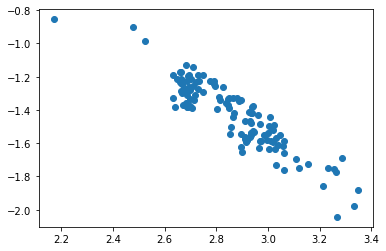

In [ ]:
plt.scatter(cycle_life, DeltaQ_Min)